In [1]:
import csv
import pandas as pd
import numpy as np

In [45]:
import matplotlib.pyplot as plt
y=pd.read_csv('labels.csv')
y1=pd.read_csv('labels.csv')
y1 = y1.dropna()

In [3]:
with open('data.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split("\t") for line in stripped if line)
    with open('data1.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        #writer.writerow(('title', 'intro'))
        writer.writerows(lines)

In [4]:
labels = y1.select_dtypes(include=['float64']).copy()
labels['class'] = pd.Series(0,dtype=int)
labels['class'] = 0

In [5]:
from sklearn.model_selection import train_test_split
x=pd.read_csv('data1.csv', delimiter = ',')
for i in range(len(labels)):
    if labels.iloc[i].sum()!=-2:
        if labels.iloc[i]['TCA'] == 1:
            labels['class'].iloc[i] = 1
        elif labels.iloc[i]['Resp'] == 1:
            labels['class'].iloc[i] = 2
        elif labels.iloc[i]['Ribo'] == 1:
            labels['class'].iloc[i] = 3
        elif labels.iloc[i]['Proteas'] == 1:
            labels['class'].iloc[i] = 4
        elif labels.iloc[i]['Hist'] == 1:
            labels['class'].iloc[i] = 5
        elif labels.iloc[i]['HTH'] == 1:
            labels['class'].iloc[i] = 6
    elif labels.iloc[i].sum()==-6:
        labels['class'].iloc[i] = 0
    else: 
        labels['class'].iloc[i] = -2

C:\Users\user\Miniconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
features = list(x.columns.values)
print(features)
classes = list(labels.columns.values)
print(classes)
a1=labels.iloc[:,6].values
a=y1.iloc[:,0].values
Y=pd.DataFrame({'ORF': a,'Class': a1})

['ORF', 'NAME', 'alpha 0', 'alpha 7', 'alpha 14', 'alpha 21', 'alpha 28', 'alpha 35', 'alpha 42', 'alpha 49', 'alpha 56', 'alpha 63', 'alpha 70', 'alpha 77', 'alpha 84', 'alpha 91', 'alpha 98', 'alpha 105', 'alpha 112', 'alpha 119', 'Elu 0', 'Elu 30', 'Elu 60', 'Elu 90', 'Elu 120', 'Elu 150', 'Elu 180', 'Elu 210', 'Elu 240', 'Elu 270', 'Elu 300', 'Elu 330', 'Elu 360', 'Elu 390', 'cdc15 10', 'cdc15 30', 'cdc15 50', 'cdc15 70', 'cdc15 90', 'cdc15 110', 'cdc15 130', 'cdc15 150', 'cdc15 170', 'cdc15 190', 'cdc15 210', 'cdc15 230', 'cdc15 250', 'cdc15 270', 'cdc15 290', 'spo 0', 'spo 2', 'spo 5', 'spo 7', 'spo 9', 'spo 11', 'spo5 2', 'spo5 7', 'spo5 11', 'spo- early', 'spo- mid', 'heat 0', 'heat 10', 'heat 20', 'heat 40', 'heat 80', 'heat 160', 'dtt 15', 'dtt 30', 'dtt 60', 'dtt 120', 'cold 0', 'cold 20', 'cold 40', 'cold 160', 'diau a', 'diau b', 'diau c', 'diau d', 'diau e', 'diau f', 'diau g']
['TCA', 'Resp', 'Ribo', 'Proteas', 'Hist', 'HTH', 'class']


In [14]:
comb = pd.merge(x,Y,on='ORF')


In [8]:
x1 = comb[comb['Class']!=-2].iloc[:,:2]
x_data = comb[comb['Class']!=-2].iloc[:,2:-1]
y_data = comb[comb['Class']!=-2].iloc[:,-1]

Imputation Procedures : Mean Imputation

In [15]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = np.nan, strategy = 'mean', axis=0)
imputer = imputer.fit(x_data)
X_imputered=imputer.transform(x_data)
print(x1.shape)
print(X_imputered.shape)

(2464, 2)
(2464, 79)


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [20]:
arr=np.concatenate((x1,X_imputered),axis=1)
features=np.array(features)
X=pd.DataFrame(arr,columns=features)

In [22]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_imputered,y_data)

In [23]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Gene-Data") 


'Gene-Data.pdf'

In [25]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=features[2:],  
                      class_names=classes,  
                     filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Gene-color")

'Gene-color.pdf'

In [27]:
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_imputered, y_data)
print(model)
# make predictions
expected = y_data
predicted = model.predict(X_imputered)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2240
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00       121
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        16

   micro avg       1.00      1.00      1.00      2464
   macro avg       1.00      1.00      1.00      2464
weighted avg       1.00      1.00      1.00      2464

[[2240    0    0    0    0    0    0]
 [   0   14    

Dimension Reduction: PCA

In [30]:
from sklearn.preprocessing import StandardScaler
xnew = StandardScaler().fit_transform(X_imputered)
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(xnew)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['A1', 'A2','A3','A4','A5','A6','A7'])
ydf=pd.DataFrame(y_data)
finalDf = pd.concat([principalDf,ydf], axis = 1)
finalDf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 2466
Data columns (total 8 columns):
A1       2464 non-null float64
A2       2464 non-null float64
A3       2464 non-null float64
A4       2464 non-null float64
A5       2464 non-null float64
A6       2464 non-null float64
A7       2464 non-null float64
Class    2464 non-null float64
dtypes: float64(8)
memory usage: 173.5 KB


In [51]:
XD1 = finalDf.ix[:,'A1':'A7']
YD1 = finalDf['Class']

C:\Users\user\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


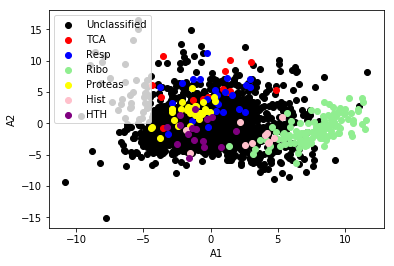

In [54]:
plt.scatter(XD1[YD1==0]['A1'], XD1[YD1==0]['A2'], label='Unclassified', c='black')
plt.scatter(XD1[YD1==1]['A1'], XD1[YD1==1]['A2'], label='TCA', c='red')
plt.scatter(XD1[YD1==2]['A1'], XD1[YD1==2]['A2'], label='Resp', c='blue')
plt.scatter(XD1[YD1==3]['A1'], XD1[YD1==3]['A2'], label='Ribo', c='lightgreen')
plt.scatter(XD1[YD1==4]['A1'], XD1[YD1==4]['A2'], label='Proteas', c='yellow')
plt.scatter(XD1[YD1==5]['A1'], XD1[YD1==5]['A2'], label='Hist', c='pink')
plt.scatter(XD1[YD1==6]['A1'], XD1[YD1==6]['A2'], label='HTH', c='purple')
plt.legend()
plt.xlabel('A1')
plt.ylabel('A2')
plt.savefig('Visual_before_sampling.png')

Over-and-Under Sampling

In [32]:
from imblearn import under_sampling,over_sampling
from collections import Counter
print("Original:")
print(sorted(Counter(y_data).items()))

from imblearn.over_sampling import SMOTE
over = {1:300,2:300,3:300,4:300,5:300,6:300} #change here to set over sampling goal for those class
x_over, y_over = SMOTE(sampling_strategy = over).fit_resample(X_imputered, y_data)
print("after over sampling:")
print(sorted(Counter(y_over).items()))

under = {0:800} # change here for under sampling goal
from imblearn.under_sampling import RandomUnderSampler
x_under, y_under = RandomUnderSampler(sampling_strategy = under ).fit_resample(x_over, y_over)
print("after Under sampling:")
print(sorted(Counter(y_under).items()))

Original:
[(0, 2240), (1, 14), (2, 27), (3, 121), (4, 35), (5, 11), (6, 16)]
after over sampling:
[(0, 2240), (1, 300), (2, 300), (3, 300), (4, 300), (5, 300), (6, 300)]
after Under sampling:
[(0, 800), (1, 300), (2, 300), (3, 300), (4, 300), (5, 300), (6, 300)]


In [33]:
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_under, y_under)
print(model)
# make predictions
expected = y_under
predicted = model.predict(x_under)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      1.00      1.00       300
           2       1.00      1.00      1.00       300
           3       1.00      1.00      1.00       300
           4       1.00      1.00      1.00       300
           5       1.00      1.00      1.00       300
           6       1.00      1.00      1.00       300

   micro avg       1.00      1.00      1.00      2600
   macro avg       1.00      1.00      1.00      2600
weighted avg       1.00      1.00      1.00      2600

[[800   0   0   0   0   0   0]
 [  0 300   0   0   0 

In [36]:
from sklearn.preprocessing import StandardScaler
xnew = StandardScaler().fit_transform(X_imputered)
from sklearn.decomposition import PCA
pca1 = PCA(n_components=7)
principalComponents1 = pca1.fit_transform(x_under)
principalDf1 = pd.DataFrame(data = principalComponents1
             , columns = ['A1', 'A2','A3','A4','A5','A6','A7'])
ydf1=pd.DataFrame({'Label': y_under})
finalDf1 = pd.concat([principalDf1,ydf1], axis = 1)
finalDf1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
A1       2600 non-null float64
A2       2600 non-null float64
A3       2600 non-null float64
A4       2600 non-null float64
A5       2600 non-null float64
A6       2600 non-null float64
A7       2600 non-null float64
Label    2600 non-null int64
dtypes: float64(7), int64(1)
memory usage: 162.6 KB


In [42]:
XD = finalDf1.ix[:,'A1':'A7']
YD = finalDf1['Label']

C:\Users\user\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


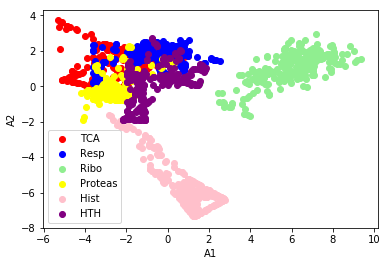

In [49]:
plt.scatter(XD[YD==1]['A1'], XD[YD==1]['A2'], label='TCA', c='red')
plt.scatter(XD[YD==2]['A1'], XD[YD==2]['A2'], label='Resp', c='blue')
plt.scatter(XD[YD==3]['A1'], XD[YD==3]['A2'], label='Ribo', c='lightgreen')
plt.scatter(XD[YD==4]['A1'], XD[YD==4]['A2'], label='Proteas', c='yellow')
plt.scatter(XD[YD==5]['A1'], XD[YD==5]['A2'], label='Hist', c='pink')
plt.scatter(XD[YD==6]['A1'], XD[YD==6]['A2'], label='HTH', c='purple')
plt.legend()
plt.xlabel('A1')
plt.ylabel('A2')
plt.savefig('Visual.png')